### Preamble / imports

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import yt
##yt.mylog.setLevel()
yt.utilities.logger.disable_stream_logging()

### Data paths

In [5]:
# put the relative or absolute directory of the problem output here
dataDir1 = '../oldruns/thu20/newgamma/amp0.001/autoDt/'
baseName1 = 'plt'
dsPath1 = dataDir1 + baseName1
tsPath1 = dsPath1 + '???????/'
ds0Path1 = dsPath1 + '0000000/'

dataDir2 = '../oldruns/thu20/newgamma/amp0.01/autoDt/'
baseName2 = 'plt'
dsPath2 = dataDir2 + baseName2
tsPath2 = dsPath2 + '???????/'
ds0Path2 = dsPath2 + '0000000/'


#### A note on accessing base state data without using yt

Its possible to get most base state info without having to use yt which might be useful / clearer / faster in a lot of situations

+ each plotfile has files for 1d data `BaseCC_0` and `BaseFC_0` (cell centered and face centered, respectively)
+ `BaseCC_0` contains `r_cc`  `rho0`  `rhoh0`  `p0`  `gamma1bar` 
+ `BaseFC_0` contains `r_edge` and `w0`
+ I've not checked what it is like in multilevel, but im pretty sure this will just be the base state at the finest uniform grid

The following snippet shows how to read this data with np.loadtxt

In [26]:
BaseCC_0 = dataDir1+'plt0000000/BaseCC_0'
BaseFC_0 = dataDir1+'plt0000000/BaseFC_0'
r_cc, rho0, rhoh0, p0, gamma1bar = np.loadtxt(BaseCC_0, skiprows=1, unpack=True)
r_edge, w0 = np.loadtxt(BaseFC_0, skiprows=1, unpack=True)

And the following show some plots

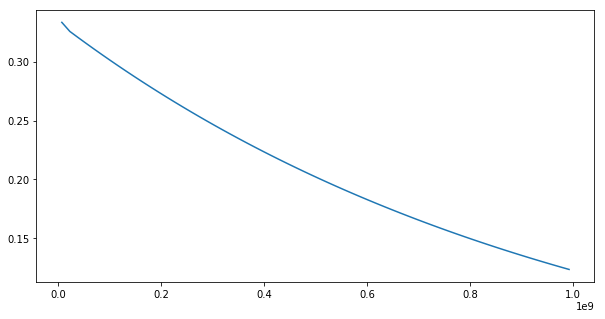

In [35]:
plt.plot(r_cc,rho0)

In [ ]:
import re
regex = re.compile('plt_.') #
matches = [string for string in pltfiles if re.match(regex, string)]
for string in matches:
    pltfiles.remove(string)

In [39]:
# this might be useful for going through all of them
import os
subfolders = [f.name for f in os.scandir(dataDir1) if f.is_dir() ]     # dirname
#subfolders = [f.path for f in os.scandir(dataDir1) if f.is_dir() ]     # full path
sorted(subfolders)

['plt0000000',
 'plt0000001',
 'plt0000002',
 'plt0000003',
 'plt0000004',
 'plt0000005',
 'plt0000006',
 'plt0000007',
 'plt0000008',
 'plt0000009',
 'plt0000010',
 'plt0000011',
 'plt0000012',
 'plt0000013',
 'plt0000014',
 'plt0000015',
 'plt0000016',
 'plt0000017',
 'plt0000018',
 'plt0000019',
 'plt0000020',
 'plt0000021',
 'plt0000022',
 'plt0000023',
 'plt0000024',
 'plt0000025',
 'plt0000026',
 'plt0000027',
 'plt0000028',
 'plt0000029',
 'plt0000030',
 'plt0000031',
 'plt0000032',
 'plt0000033',
 'plt0000034',
 'plt0000035',
 'plt0000036',
 'plt0000037',
 'plt0000038',
 'plt0000039',
 'plt0000040',
 'plt0000041',
 'plt0000042',
 'plt0000043',
 'plt0000044',
 'plt0000045',
 'plt0000046',
 'plt0000047',
 'plt0000048',
 'plt0000049',
 'plt0000050',
 'plt0000051',
 'plt0000052',
 'plt0000053',
 'plt0000054',
 'plt0000055',
 'plt0000056',
 'plt0000057',
 'plt0000058',
 'plt0000059',
 'plt0000060',
 'plt0000061',
 'plt0000062',
 'plt0000063',
 'plt0000064',
 'plt0000065',
 'plt00000

## Compare base state quantities (1D)

One of the challanges will be that you might have output at different times (even if they are close, because of different DT)

Need to do some sort of database corralation to decide which two slices to compare? 

Or, just ensure/force the simulations to have output that is close enough? 

In [71]:
# dumb function that compares two datasets at the same index - up to user to check if its a fair comparison
# this can be pretty easily extended to multiple indexes and still having this as the default behaviour
    
def compareTwo(ts1,ts2, index, var, normalise = True):
    
    def RayData(ds,var):
        ray = ds.ortho_ray(1,(0,0))
        y = np.array(ray['y'])
        rayData = np.array(ray[var])
        return y, rayData
    
    y1, rayData1 = RayData(ts1[index],var)
    y2, rayData2 = RayData(ts2[index],var)

    if normalise: and index != 0:
        y01, rayData01 = RayData(ts1[0],var)
        y02, rayData02 = RayData(ts2[0],var)
        
        rayData1 = rayData1 / RayData01
        rayData2 = rayData2 / RayData02


    plt.plot(y1, rayData1, 'r+', y2, rayData2, 'bx')
    plt.xlabel('path length')
    plt.ylabel(var)
    plt.title('index = {}, time(set1) = {}, time(set2) = {}'.format(index, float(ts1[index].current_time), float(ts2[index].current_time)))
        

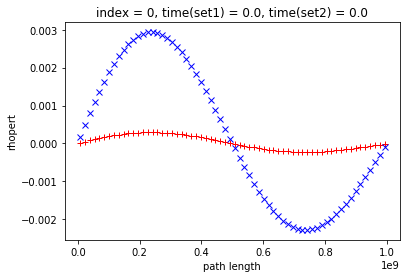

In [72]:
ts1 = yt.load(tsPath1)
ts2 = yt.load(tsPath2)

myFun(ts1,ts2,0,"rhopert")

In [30]:
def fun():
    return 1, 2

a, b = fun()
print(a)
print(b)

1
2


In [62]:
float(ts1[0].current_time)

0.0

In [27]:
normalise=True
index = 1

if normalise and index != 0:
    print('true')

true


### Energy comparison

Goes here